# Thompson Sampling

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [11]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [12]:
N = 10000                       # num of users
d = 10                          # num of ad
ads_selected = []
# --- Step 1 ---
numbers_of_rewards1 = [0]*d     # Ni^1
numbers_of_rewards0 = [0]*d     # Ni^0
# --- Step 2 ---
total_reward = 0
for n in range(0, N): # for each round n
    ad = 0
    max_random = 0
    for i in range(0,d): # for each ad i
        random_beta = random.betavariate(numbers_of_rewards1[i] + 1, numbers_of_rewards0[i] + 1)
        # --- Step 3 ---
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards1[ad] += 1
    else:
        numbers_of_rewards0[ad] += 1
    total_reward += reward

## Visualising the results - Histogram

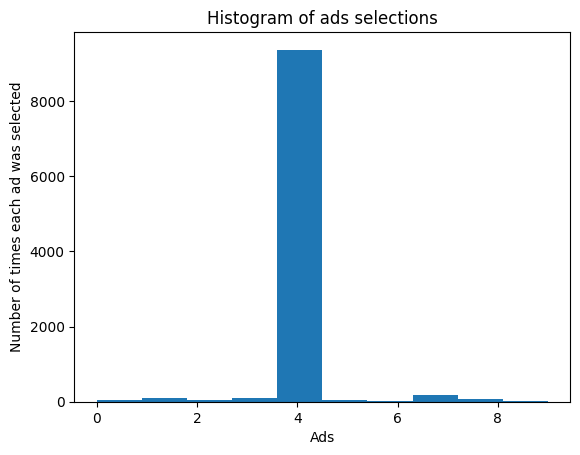

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()